## === A. Data Preparation & Preprocessing ===

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\ASIF\Downloads\Mall_Customers.csv")

In [4]:
# Explore dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
# Check for missing and duplicate values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 0


In [9]:
# Encode categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male:1, Female:0

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## === B. Dimensionality Reduction ===

In [14]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
X_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [18]:
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33690046 0.26230645]


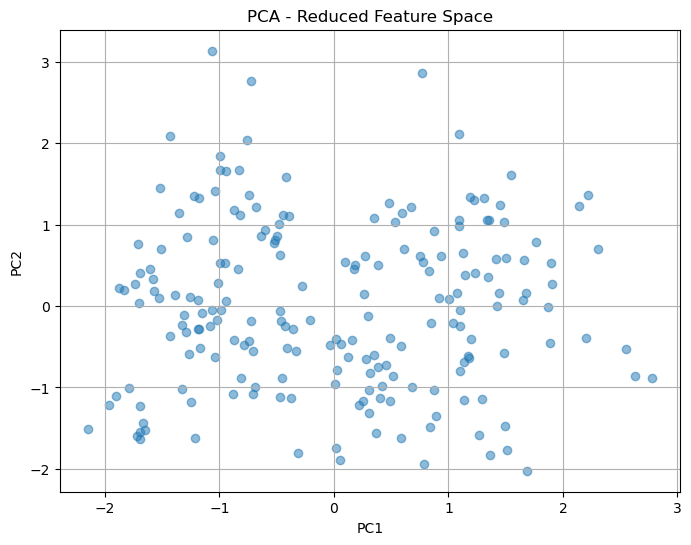

In [19]:
# Plot PCA result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA - Reduced Feature Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

## === C. Clustering Implementation ===

In [20]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

## --- KMeans ---
### Elbow Method

In [25]:
import warnings 
warnings.filterwarnings('ignore')

In [26]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

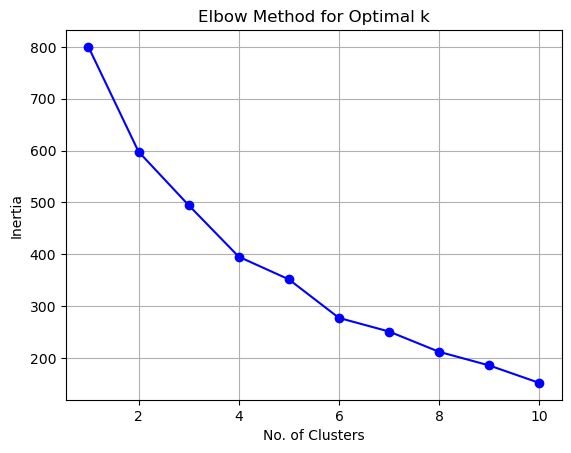

In [27]:
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [45]:
# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

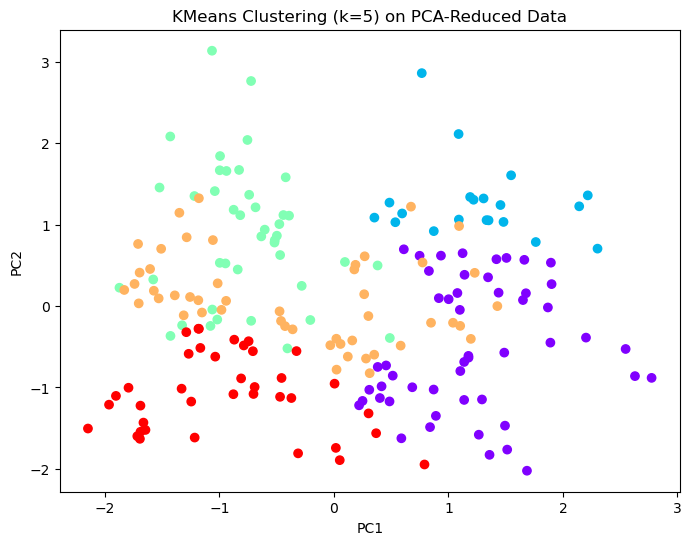

In [46]:
# Visualize clusters (PCA)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clustering (k=5) on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## === Evaluation ===

In [47]:
print("--- Evaluation Metrics ---")
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))

--- Evaluation Metrics ---
KMeans Silhouette Score: 0.27191023466188324
KMeans Davies-Bouldin Index: 1.1810914524061709


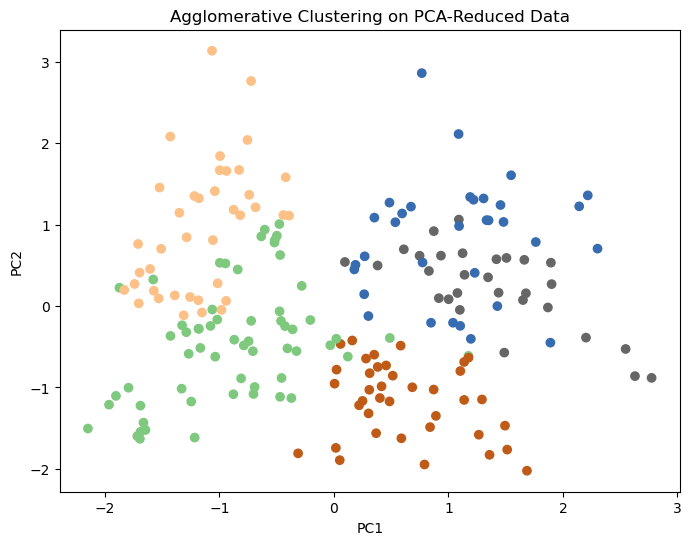

Agglomerative Silhouette Score: 0.28699413201651747
Agglomerative Davies-Bouldin Index: 1.2197730790225614


In [48]:
# Optional: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=)
agglo_labels = agglo.fit_predict(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='Accent')
plt.title("Agglomerative Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo_labels))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo_labels))